#Cargar dependencias

In [ ]:
%%capture
!pip install bertopic
!python -m spacy download es_core_news_sm

In [ ]:
import os
import re
import nltk
import pandas as pd
import spacy
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bertopic import BERTopic
from bertopic.representation import KeyBERTInspired
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP
from sentence_transformers import SentenceTransformer
from google.colab import drive

Descargar recursos de NLTK y cargar Spacy para español


In [ ]:
# Descargar recursos de NLTK y cargar Spacy para español
nltk.download('punkt')
nltk.download('punkt_tab')
nlp = spacy.load("es_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


##Montar Google Drive

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


##Definir carpeta con las letras de canciones

In [ ]:
# Definir carpeta con las letras de canciones
ruta_csv = '/content/drive/MyDrive/Lenguaje Natural/Letra narcocorridos/Documento/resultados 27-03-2025/letras_corridos_limpio.csv'

## Cargar el archivo CSV

In [ ]:
df_canciones = pd.read_csv(ruta_csv)

##Función para limpiar texto según la configuración

In [ ]:
# Función para limpiar texto según la configuración
def limpiar_texto(texto, stopwords_remove=False):
    texto = str(texto).lower()
    texto = re.sub(r'[^a-záéíóúñü\s]', '', texto)
    palabras = word_tokenize(texto)

    if stopwords_remove:
        doc = nlp(texto)
        palabras = [token.text for token in doc if not token.is_stop]

    return ' '.join(palabras)

## Cargar canciones con diferentes preprocesamientos

In [ ]:
# Cargar canciones con el preprocesamiento 'SinStopword'
experimentos = {
    "SinStopword": df_canciones['lyrics'].apply(lambda x: limpiar_texto(x, stopwords_remove=True)).tolist()
}

# Definir vectorizador para n-gramas


In [ ]:
# Definir vectorizador para n-gramas
vectorizer_model = CountVectorizer(ngram_range=(1, 3))

Comparación entre BERTopic con BETO y sin BETO

In [ ]:
# Ejecutar BERTopic para 'SinStopword' con embeddings por defecto
nombre_exp = "SinStopword"
datos = experimentos[nombre_exp]

print(f"Ejecutando BERTopic para: {nombre_exp} (sin BETO, con UMAP)")
topic_model_default = BERTopic(representation_model=KeyBERTInspired(),
                                vectorizer_model=vectorizer_model, language="spanish",
                                calculate_probabilities=True, verbose=True)
topics_default, probs_default = topic_model_default.fit_transform(datos)
topic_model_default.update_topics(datos, vectorizer_model=vectorizer_model)
df_default = topic_model_default.get_topic_info()
df_default.to_csv(f"/content/{nombre_exp}_temas_DEFAULT.csv", index=False)
print(f"Temas sin BETO guardados en: {nombre_exp}_temas_DEFAULT.csv")

# Ejecutar BERTopic para 'SinStopword' con BETO
print(f"Ejecutando BERTopic para: {nombre_exp} (con BETO, con UMAP)")
modelo_beto = SentenceTransformer("dccuchile/bert-base-spanish-wwm-uncased")
topic_model_beto = BERTopic(embedding_model=modelo_beto, representation_model=KeyBERTInspired(),
                             vectorizer_model=vectorizer_model, language="spanish",
                             calculate_probabilities=True, verbose=True)
topics_beto, probs_beto = topic_model_beto.fit_transform(datos)
topic_model_beto.update_topics(datos, vectorizer_model=vectorizer_model)
df_beto = topic_model_beto.get_topic_info()
df_beto.to_csv(f"/content/{nombre_exp}_temas_BETO.csv", index=False)
print(f"Temas con BETO guardados en: {nombre_exp}_temas_BETO.csv")

2025-03-27 17:25:47,565 - BERTopic - Embedding - Transforming documents to embeddings.


Ejecutando BERTopic para: SinStopword (sin BETO, con UMAP)


Batches:   0%|          | 0/78 [00:00<?, ?it/s]

2025-03-27 17:30:44,558 - BERTopic - Embedding - Completed ✓
2025-03-27 17:30:44,559 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 17:30:56,154 - BERTopic - Dimensionality - Completed ✓
2025-03-27 17:30:56,156 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 17:30:56,433 - BERTopic - Cluster - Completed ✓
2025-03-27 17:30:56,440 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-27 17:31:03,465 - BERTopic - Representation - Completed ✓


Temas sin BETO guardados en: SinStopword_temas_DEFAULT.csv
Ejecutando BERTopic para: SinStopword (con BETO, con UMAP)


Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-uncased and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
2025-03-27 17:31:07,405 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/78 [00:00<?, ?it/s]

2025-03-27 17:53:36,838 - BERTopic - Embedding - Completed ✓
2025-03-27 17:53:36,844 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-03-27 17:53:52,383 - BERTopic - Dimensionality - Completed ✓
2025-03-27 17:53:52,390 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-03-27 17:53:52,746 - BERTopic - Cluster - Completed ✓
2025-03-27 17:53:52,754 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-03-27 17:55:56,578 - BERTopic - Representation - Completed ✓


Temas con BETO guardados en: SinStopword_temas_BETO.csv


## Generar visualizaciones de los temas

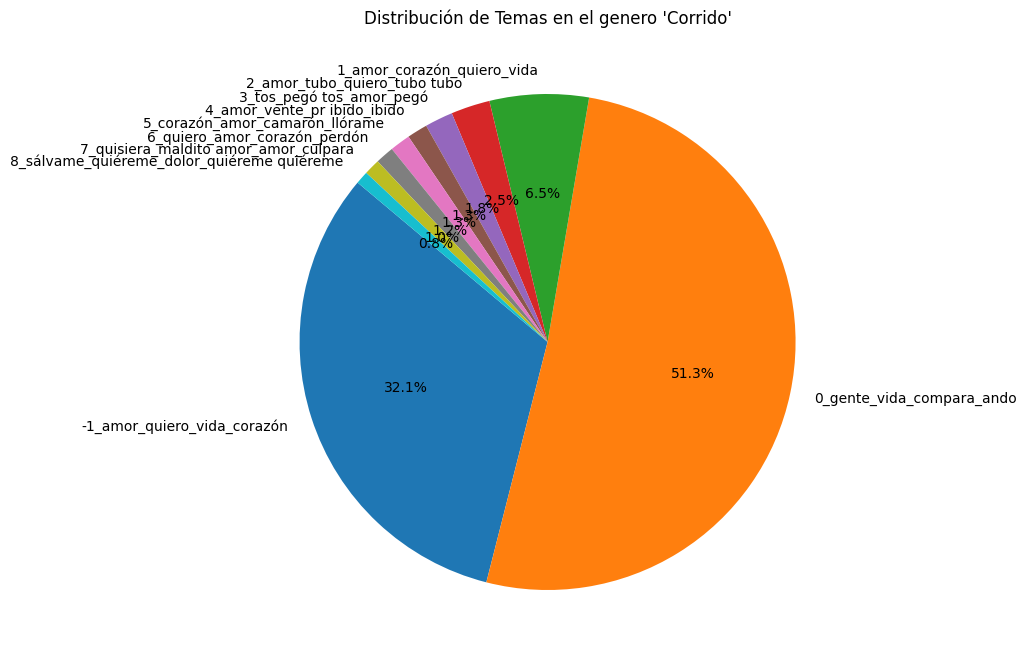

In [ ]:
# Generar visualizaciones de los temas
def graficar_distribucion_temas(df_topics, title="Distribución de Temas"):
    plt.figure(figsize=(8, 10))
    plt.pie(df_topics['Count'].head(10), labels=df_topics['Name'].head(10), autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

In [ ]:
print("\nVisualización para modelo sin BETO:")
graficar_distribucion_temas(df_beto, title="Distribución de Temas en 'SinStopword' (sin BETO)")

In [ ]:
print("\nVisualización para modelo con BETO:")
graficar_distribucion_temas(df_beto, title="Distribución de Temas en 'SinStopword' (con BETO)")

In [ ]:
# Visualización de temas con BERTopic
topic_model.visualize_barchart(top_n_topics=10)

In [ ]:
topic_model_beto.visualize_topics()